In [1]:
# linux
username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")
include(pathtorepo * "/system.jl")

  Activating project at `~/work/repo_ds/dynamical-systems/env/integrate`


tetrapart_model (generic function with 1 method)

In [2]:
"""username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");"""

"username = \"Alex\"\npathtorepo = \"C:\\Users\\\" *username *  \"\\Desktop\\\"\nusing Pkg\nPkg.activate(pathtorepo * \"dynamical-systems\\env\\integrate\\\")\ninclude(pathtorepo * \"dynamical-systems\\system.jl\")\ninclude(pathtorepo * \"dynamical-systems\\visual_regimes.jl\");"

In [3]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra, JLD
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie

In [4]:
cd("/home/nova/work/repo_ds/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Сопоставление с матконт/файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:];

In [5]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [6]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [7]:
#index = 150
index  = 148                
I0_hom[index], u0_hom[index]

(-1.7262074829061693, 0.26649825810897465)

In [8]:
I0 = I0_hom[index]; U0 = u0_hom[index];
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

In [9]:
u0_1 = [1.7323743011856878, 0.9266986923176257, 0.8737569289034843]; 
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)
tands = TangentDynamicalSystem(ds; J = jacob_TM_);
println("init state: $(ds.integ.u)")

init state: [1.7323743011856878, 0.9266986923176257, 0.8737569289034843]


In [10]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [11]:
tr, trange = trajectory(ds, 1000, Δt = tstep);

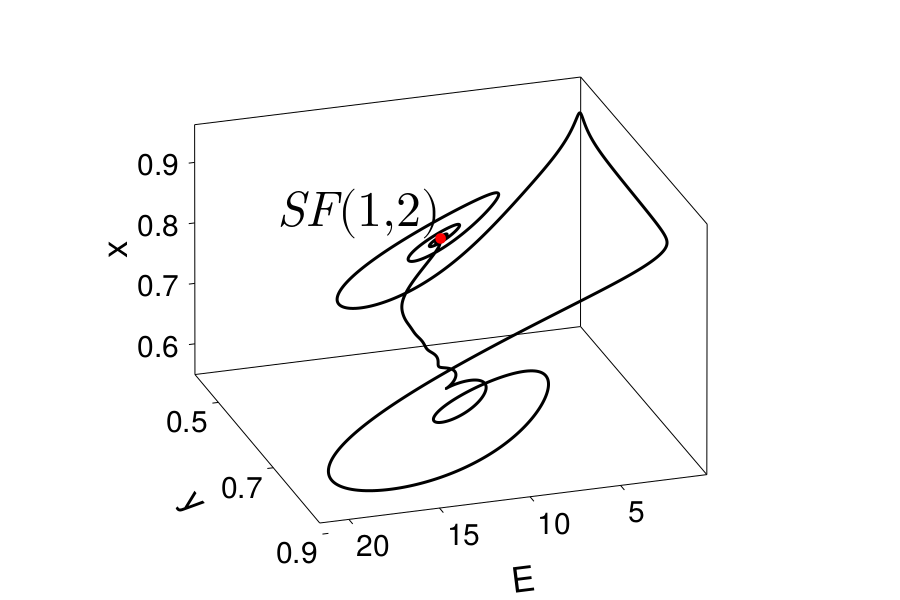

CairoMakie.Screen{IMAGE}


In [12]:
ts, tf = 100000, 150000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis,
            yticks = [0.5, 0.7, 0.9])

lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
    linewidth = 3.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 50, color = :black, align = (:right, :bottom))
end

display(f)

In [13]:
save("/home/nova/work/images/TM/large_interval_phase.eps", f)

CairoMakie.Screen{EPS}


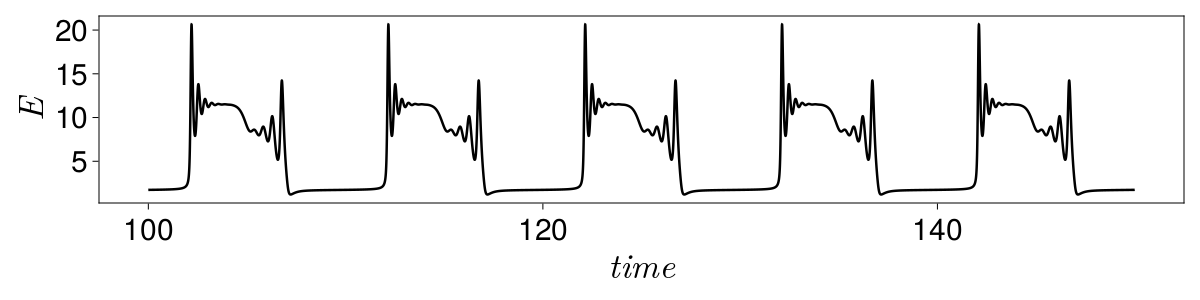

In [14]:
ts, tf = 100000, 150000
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [15]:
save("/home/nova/work/images/TM/large_interval_ts.eps", f)

CairoMakie.Screen{EPS}
